# The Perceptron Model from Scratch

In this notebook, I implement the most basic form of a neural network - the Perceptron Model. It is effectively a neural network with a singular neuron.

This is written with the help of the book: Machine Learning with PyTorch and Scikit-learn from Packt Publishing.

### Imports and Setup

In [18]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
sns.set_style('darkgrid')

### Make Synthetic Regression Data

In [33]:
from sklearn.datasets import make_classification

In [37]:
X, y = make_classification(n_samples=10000, n_features=5, n_classes=1)

In [38]:
X

array([[-0.62902109, -1.63197609,  0.16990796, -1.29138538,  1.87132587],
       [-0.83551324, -0.52092957,  0.27352808,  0.02614599,  0.80492517],
       [-1.17737003, -0.29599814,  1.5106824 ,  0.50010351,  0.68716761],
       ...,
       [-1.23106268, -2.14154323, -1.51050146, -1.4144647 ,  2.58829514],
       [-0.34445961, -1.74963119,  0.2926343 , -1.61232955,  1.89833604],
       [-1.60518659,  1.35931753,  1.12348224,  2.5460471 , -0.86232871]])

In [39]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [40]:
# standardize data
from sklearn.preprocessing import StandardScaler

In [41]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

In [42]:
X_std = scaler_X.fit_transform(X.reshape(-1, 1))
y_std = scaler_y.fit_transform(y.reshape(-1, 1))

In [43]:
X_std

array([[-0.39325053],
       [-1.17616739],
       [ 0.23040161],
       ...,
       [ 0.97477138],
       [ 2.08523996],
       [-0.57537283]])

In [44]:
y_std

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

### Implementing The Perceptron Model

In [45]:
class PerceptronModel():

  def __init__(self, learning_rate=0.01, n_iter=500, random_state=42):
    self.learning_rate = learning_rate
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):

    # initialize random state
    random_generator = np.random.RandomState(self.random_state)

    # initialize weight terms from the standard normal distribution, and the bias term as zero
    self.w_ = random_generator.normal(loc=0.0, scale=0.01, size=X.shape[1])
    self.b_ = np.array([0.])

    # initialize list to store loss function calculations
    self.losses_ = []

    # for every iteration in n_iter
    for i in range(self.n_iter):

      # initialize the error term
      errors = 0

      # and for every feature in the dataset (Xi)
      for xi, target in zip(X, y):

        # calculate the error and then update the weights and biases
        update = self.learning_rate * (target - self.predict(xi))
        self.w_ += update * xi
        self.b_ += update

        # add error to the error term if update is not, then append to losses list
        errors += int(update != 0)
      self.losses_.append(errors)

    return self


  def predict(self, X):
    return np.where(self.net_input(X) >= 0, 1, 0)

  def net_input(self, X):
    return np.dot(X, self.w_) + self.b_

### Testing the Perceptron Model

In [49]:
model = PerceptronModel(n_iter=3)

In [50]:
model.fit(X_std, y_std)

<ipython-input-45-9071729ed65c>:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors += int(update != 0)


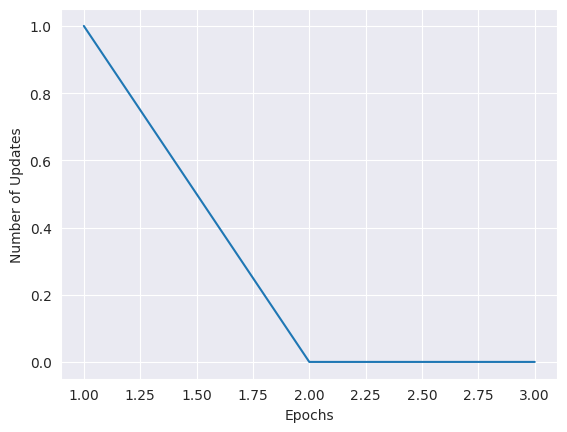

In [51]:
plt.plot(range(1, len(model.losses_)+1), model.losses_)

plt.xlabel('Epochs')
plt.ylabel('Number of Updates')

plt.show()